## 1. Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [2]:
df=pd.read_table('fruit_data_with_colors.txt')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
df.shape

(59, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


The data is clean and we do not perform Data Cleaning.

## 3. Exploratory Data Analysis

In [6]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [7]:
df['fruit_subtype'].unique()

array(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious',
       'cripps_pink', 'spanish_jumbo', 'selected_seconds', 'turkey_navel',
       'spanish_belsan', 'unknown'], dtype=object)

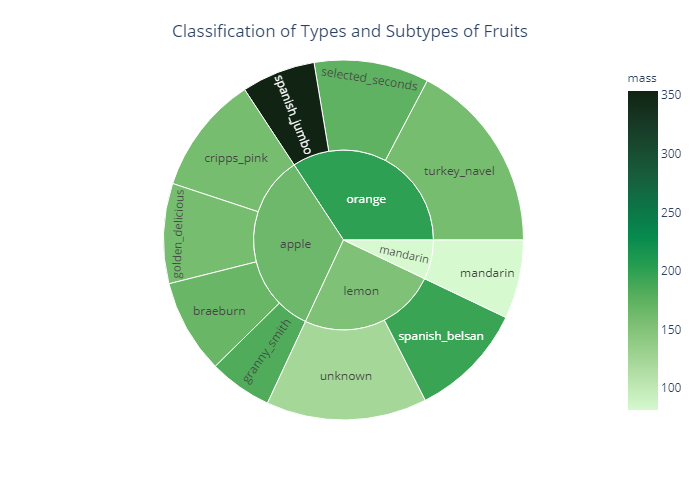

In [11]:
fig= px.sunburst(data_frame=df,path=['fruit_name','fruit_subtype'], color='mass',values='width', color_continuous_scale='algae')
fig.update_layout(
    title={
        'text': 'Classification of Types and Subtypes of Fruits',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

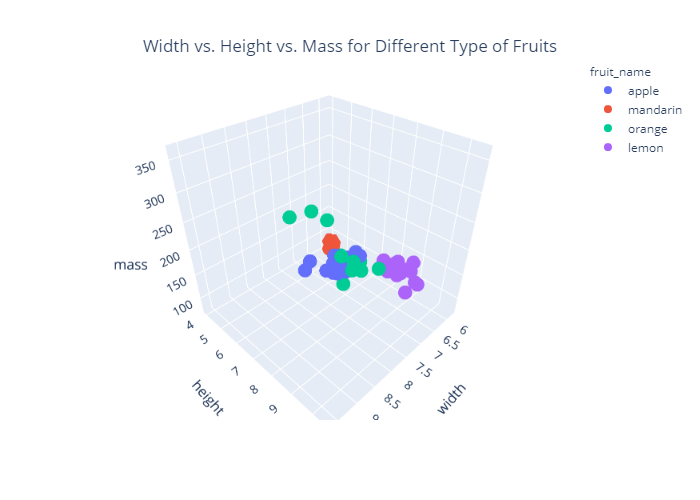

In [12]:
fig=px.scatter_3d(df,x='width',y='height',z='mass',color='fruit_name',color_continuous_scale='teal')
fig.update_layout(
    title={
        'text': 'Width vs. Height vs. Mass for Different Type of Fruits',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

## 4. Prediction of Fruits types by KNN

### 4.1. Standardizing the Data

In [10]:
ss=StandardScaler()

In [11]:
ss.fit(df[['mass', 'width', 'height']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled=ss.transform(df[['mass', 'width', 'height']])

In [13]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[3:6])

In [14]:
scaled_df.head()

,mass,width,height
0,0.529442,1.598690,-0.291397
1,0.309462,1.104854,-0.661922
2,0.236136,0.364100,-0.365502
3,-1.413709,-1.117409,-2.218131
4,-1.450372,-1.364327,-2.292236


In [15]:
scaled_df.shape

(59, 3)

### 4.2. Splitting the Data

In [16]:
X=scaled_df
y=df['fruit_name']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.3. Finding the Optimal number of Neighbors (K)

In [18]:
error_rate=[]
for n in range(1,40):
    knc=KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train,y_train)
    prediction=knc.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test))
print(error_rate)

[0.2777777777777778, 0.2222222222222222, 0.2777777777777778, 0.2777777777777778, 0.3333333333333333, 0.3888888888888889, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.5, 0.6666666666666666, 0.7222222222222222, 0.7222222222222222, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778]


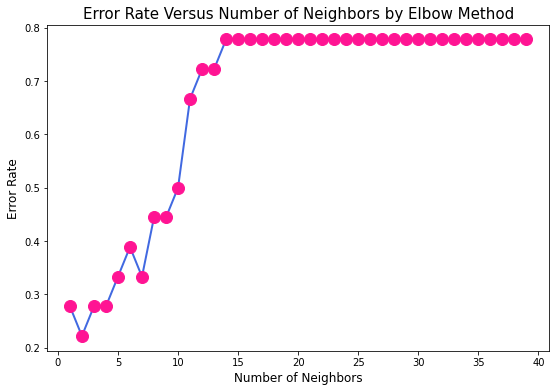

In [19]:
plt.figure(figsize=(9,6))
plt.plot(list(range(1,40)), error_rate, color='royalblue', marker='o',linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink' )
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Number of Neighbors by Elbow Method', fontsize=15)
plt.show()

We can see that the minimum error rate is obtained for k=2.

### 4.4. Performing KNN with the Chosen Number of Neighbors

In [20]:
knc=KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [21]:
prediction_knn=knc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,prediction_knn))
print('\n')
print(classification_report(y_test,prediction_knn))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_knn), ndigits=2))

[[4 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [4 0 0 5]]


              precision    recall  f1-score   support

       apple       0.50      1.00      0.67         4
       lemon       1.00      1.00      1.00         3
    mandarin       1.00      1.00      1.00         2
      orange       1.00      0.56      0.71         9

    accuracy                           0.78        18
   macro avg       0.88      0.89      0.85        18
weighted avg       0.89      0.78      0.78        18



Accuracy Score:  0.78


The accuracy of our model is 78% . Now let's test the prediction of our model for given values.

### 4.5. Evaluating the Performace of the Model

In [23]:
scaled_df.head()

,mass,width,height
0,0.529442,1.598690,-0.291397
1,0.309462,1.104854,-0.661922
2,0.236136,0.364100,-0.365502
3,-1.413709,-1.117409,-2.218131
4,-1.450372,-1.364327,-2.292236


First we choose the first row of scaled_df and df and evaluate the prediction of our model.

In [24]:
knc.predict([[0.529442, 1.598690, -0.291397]])

array(['apple'], dtype=object)

In [27]:
df['fruit_name'].iloc[0]

'apple'

Our model predicted the name of the fruit accurately.

Now we choose the fourth row of scaled_df and df and evaluate the prediction of our model.

In [25]:
knc.predict([[-1.413709,-1.117409,-2.218131]])

array(['mandarin'], dtype=object)

In [28]:
df['fruit_name'].iloc[3]

'mandarin'

We can see that the prediction of our model for these two random instances are correct.

## 5. Conclusion

-  Here we worked on Fruits with Colors Dataset and implemented K-Nearest Neighbors Classification to predict the type of fruit


-  The K-Nearest Neighbors Classifier performed well with 78% accuracy in predicting type of fruits.